<a href="https://colab.research.google.com/github/Pavi4126/CODSOFT/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TITANIC SURVIVAL PREDICTION**

### **Import Necessary Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### **Load the dataset**

In [4]:
titanic_data = pd.read_csv('/content/Titanic-Dataset.csv')

### **Preview the dataset**

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Shape of the Titanic dataset**

In [7]:
titanic_data.shape

(891, 12)

**Column names of the Titanic dataset**

In [8]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Summary statistics of the Titanic dataset**

In [9]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **Data Cleaning and Preprocessing**

**Number of missing values in the Titanic dataset**

In [10]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Grouping by Sex and Calculating Mean Age**

In [11]:
titanic_data.groupby('Sex')['Age'].mean().reset_index()

,Sex,Age
0,female,27.915709
1,male,30.726645


**Filling Missing Age Values**

In [12]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
print(titanic_data['Age'].tail(3))

888    29.699118
889    26.000000
890    32.000000
Name: Age, dtype: float64


**Dropping the 'Cabin' Column**

In [13]:
titanic_data.drop('Cabin',axis=1,inplace=True)

**Dropping Rows with Missing Values**

In [14]:
titanic_data.dropna(inplace=True)

**DataFrame Information**

In [15]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


### **Exploratory Data Analysis**

**Visualize the distribution of passengers by gender**

In [16]:
gender_counts = titanic_data['Sex'].value_counts()
gender_counts

Sex
male      577
female    312
Name: count, dtype: int64

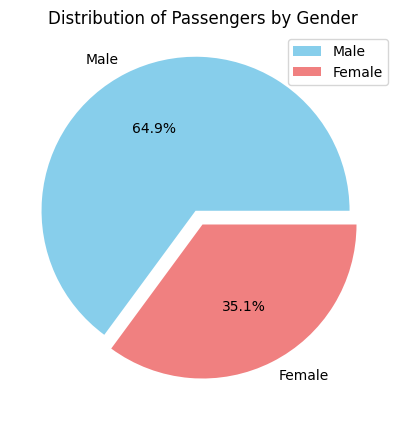

In [17]:
plt.figure(figsize=(6, 5))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%.1f%%', colors=['skyblue', 'lightcoral'], explode=(0.1, 0))
plt.legend(loc='upper right')
plt.title('Distribution of Passengers by Gender')
plt.show()

**Age Distribution Histogram with KDE**

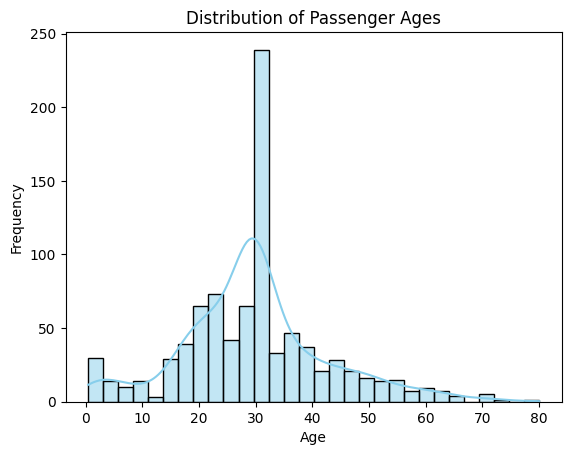

In [18]:
sns.histplot(data=titanic_data, x='Age', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Survival Frequency by Gender**

In [19]:
survival_gender = titanic_data[['Survived','Sex']].value_counts().reset_index()
survival_gender

,Survived,Sex,count
0,0,male,468
1,1,female,231
2,1,male,109
3,0,female,81


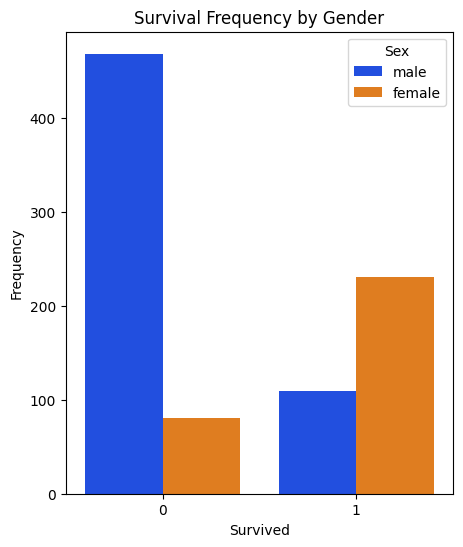

In [20]:
plt.figure(figsize=(5, 6))
sns.countplot(data=titanic_data, x='Survived', hue='Sex', palette="bright")
plt.title('Survival Frequency by Gender')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

**Frequency of Passengers by Embarked Port and Sex**

In [21]:
Embarked_sex = titanic_data[['Embarked', 'Sex']].value_counts().reset_index()
Embarked_sex

,Embarked,Sex,count
0,S,male,441
1,S,female,203
2,C,male,95
3,C,female,73
4,Q,male,41
5,Q,female,36


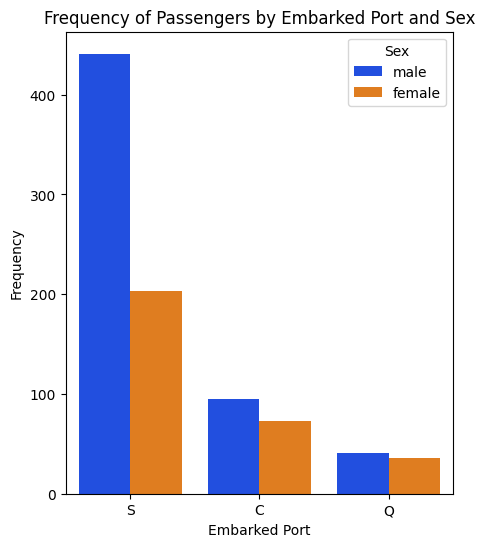

In [22]:
plt.figure(figsize=(5, 6))
sns.countplot(data=titanic_data, x='Embarked', hue='Sex', palette="bright")

plt.title('Frequency of Passengers by Embarked Port and Sex')
plt.xlabel('Embarked Port')
plt.ylabel('Frequency')
plt.show()

**Distribution of Survivors by Embarked Port**

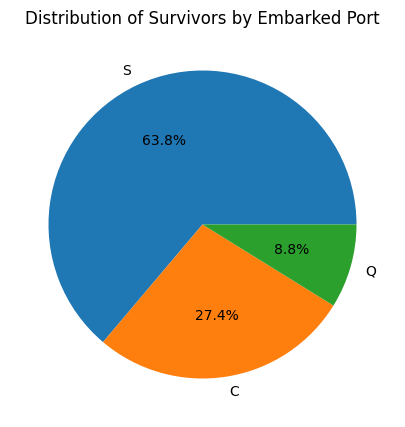

In [23]:
survivors_by_embarked = titanic_data[titanic_data['Survived'] == 1]['Embarked'].value_counts().reset_index()
survivors_by_embarked.columns = ['Embarked', 'Survivor Count']

plt.figure(figsize=(6, 5))
plt.pie(survivors_by_embarked['Survivor Count'], labels=survivors_by_embarked['Embarked'], autopct='%1.1f%%')

plt.title('Distribution of Survivors by Embarked Port')
plt.show()

In [24]:
survived_embarked = titanic_data[['Survived', 'Embarked']].value_counts().reset_index()
survived_embarked

,Survived,Embarked,count
0,0,S,427
1,1,S,217
2,1,C,93
3,0,C,75
4,0,Q,47
5,1,Q,30


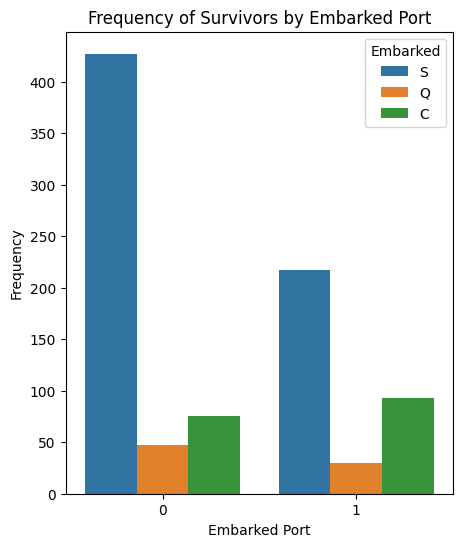

In [25]:
plt.figure(figsize=(5, 6))
sns.countplot(data=titanic_data, x='Survived', hue='Embarked')

plt.title('Frequency of Survivors by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Frequency')
plt.show()

**Frequency of Survivors by Passenger Class**

In [26]:
survived_pclass = titanic_data[['Survived', 'Pclass']].value_counts().reset_index()
survived_pclass

,Survived,Pclass,count
0,0,3,372
1,1,1,134
2,1,3,119
3,0,2,97
4,1,2,87
5,0,1,80


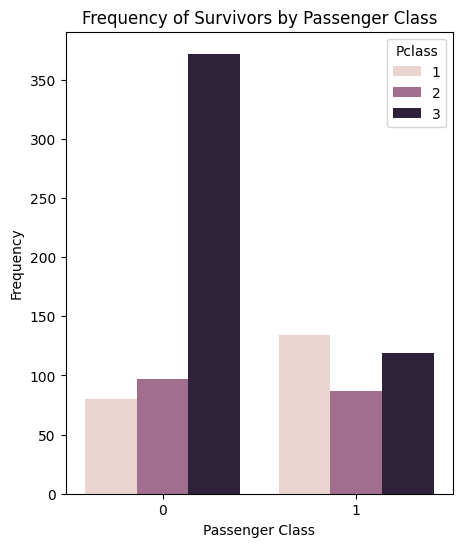

In [27]:
plt.figure(figsize=(5, 6))
sns.countplot(data=titanic_data, x='Survived', hue='Pclass')

plt.title('Frequency of Survivors by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Frequency')
plt.show()

### **Random Forest Classifier**

**Encode categorical variables**

In [28]:
encoder = LabelEncoder()
titanic_data["Sex"] = encoder.fit_transform(titanic_data["Sex"])
titanic_data["Embarked"] = encoder.fit_transform(titanic_data["Embarked"])
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         2  
1          PC 17599  71.2833         0  
2  STON/O2. 3101282   7.9250         2  
3            113803  53.1000         2  
4            373450   8.0500         2  


**Feature Selection**

In [29]:
X = titanic_data.drop(["PassengerId", "Survived", "Name", "Ticket"], axis=1)
y = titanic_data["Survived"]

**Model Selection and Training**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Model Evaluation**

In [31]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7696629213483146


In [32]:
confusion_matrix(y_test,y_pred)

array([[85, 24],
       [17, 52]])

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       109
           1       0.68      0.75      0.72        69

    accuracy                           0.77       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.78      0.77      0.77       178

